**Text to Img Generation using Stable Diffusion and diffusers**

In [1]:
!pip install diffusers transformers accelerate

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [3]:
!pip show torch

Name: torch
Version: 2.8.0+cu126
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, setuptools, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [4]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
#model_id1 = "black-forest-labs/FLUX.1-dev"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe.enable_model_cpu_offload()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [6]:
# OG PROMPT
prompt = """
night view of Mumbai skyline, glowing skyscrapers, Marine Drive curving along the coast, cars forming golden trails, Arabian Sea reflecting lights. Ultra-realistic, 8K, HDR, cinematic, dramatic sky, lively and modern vibe.
"""


In [7]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

PROMPT: 
night view of Mumbai skyline, glowing skyscrapers, Marine Drive curving along the coast, cars forming golden trails, Arabian Sea reflecting lights. Ultra-realistic, 8K, HDR, cinematic, dramatic sky, lively and modern vibe.



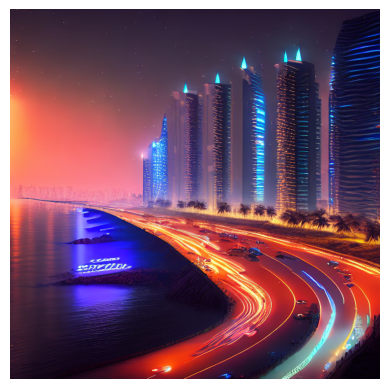

In [8]:
print(f"PROMPT: {prompt}")
plt.imshow(image);
plt.axis('off');

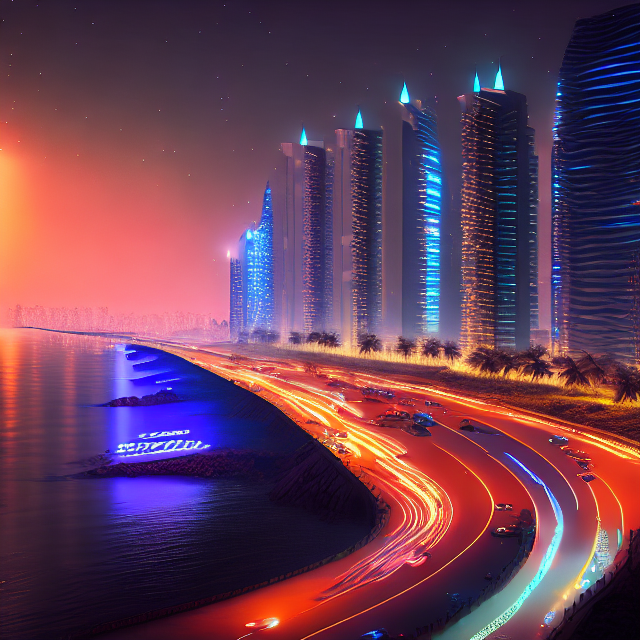

In [9]:
image

In [21]:
prompt2 = """
night view of Mumbai skyline, glowing skyscrapers, Marine Drive curving along the coast, cars forming golden trails, Arabian Sea reflecting lights. Ultra-realistic, 8K, HDR, cinematic, dramatic sky, lively and modern vibe.
"""

In [22]:
image2 = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

PROMPT: 
night view of Mumbai skyline, glowing skyscrapers, Marine Drive curving along the coast, cars forming golden trails, Arabian Sea reflecting lights. Ultra-realistic, 8K, HDR, cinematic, dramatic sky, lively and modern vibe.



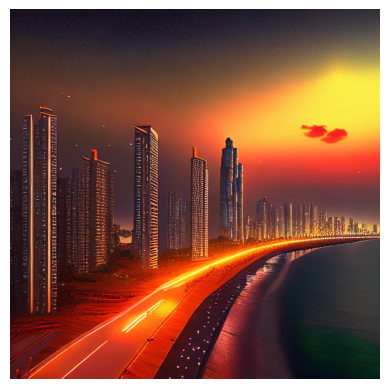

In [23]:
print(f"PROMPT: {prompt2}")
plt.imshow(image2);
plt.axis('off');

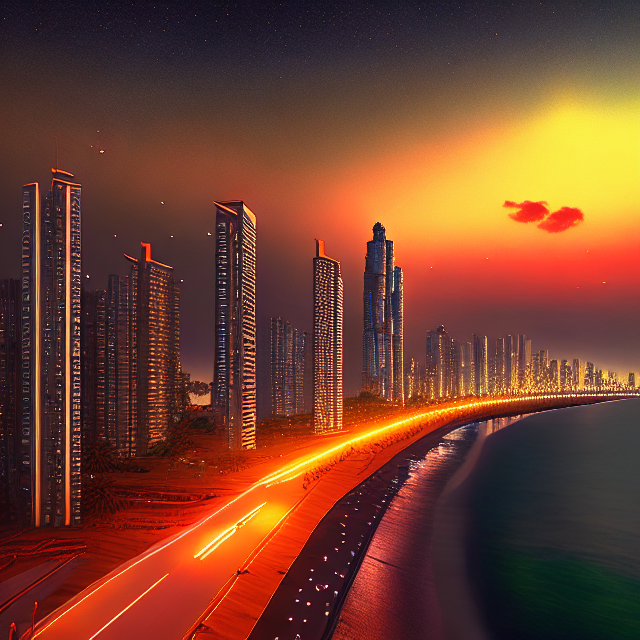

In [24]:
image2

In [25]:
# model_id3 = "stable-diffusion-v1-5/stable-diffusion-v1-5"
# pipe = StableDiffusionPipeline.from_pretrained(model_id3, torch_dtype=torch.float16, use_safetensors=True)
# pipe.enable_model_cpu_offload()
# prompt4="""
# night view of Mumbai skyline, glowing skyscrapers, Marine Drive curving along the coast, cars forming golden trails, Arabian Sea reflecting lights. Ultra-realistic, 8K, HDR, cinematic, dramatic sky, lively and modern vibe.
# """
# image4 = pipe(prompt4).images[0]
# image4

Working with stable diffusion parameters
1. Negative prompting
2. num_inference_steps
3. height
4. weight
5. num_images_per_prompt

In [26]:
def generate_image(pipe, prompts, params):
    # Generate image
    result = pipe(prompts, **params)
    img = result.images

    num_images = len(img)
    if num_images > 1:
        fig, ax = plt.subplots(nrows=1, ncols=num_images, figsize=(5*num_images, 5))
        for i in range(num_images):
            ax[i].imshow(img[i])
            ax[i].axis('off')
        plt.tight_layout()
    else:
        plt.imshow(img[0])
        plt.axis('off')
    plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

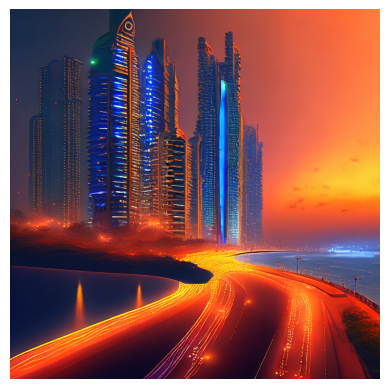

In [29]:
prompts="""
night view of Mumbai skyline, glowing skyscrapers, Marine Drive curving along the coast, cars forming golden trails, Arabian Sea reflecting lights. Ultra-realistic, 8K, HDR, cinematic, dramatic sky, lively and modern vibe.
"""
params={}
generate_image(pipe,prompts,params)


  0%|          | 0/50 [00:00<?, ?it/s]

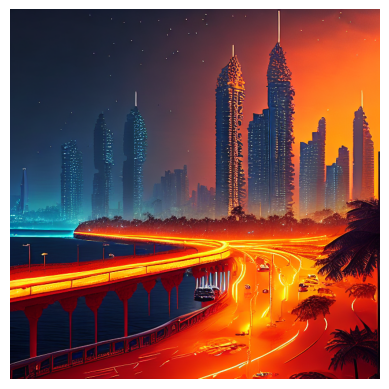

In [30]:
#num_inference_steps
params = {'num_inference_steps':50}
generate_image(pipe,prompts,params)

  0%|          | 0/50 [00:00<?, ?it/s]

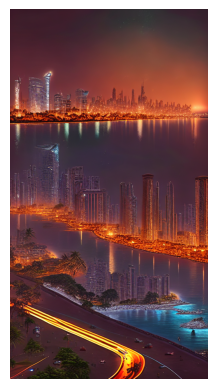

In [31]:
#height width

params = {'num_inference_steps':50,'width':512 , 'height': int(1.5*640)}
generate_image(pipe,prompts,params)

  0%|          | 0/50 [00:00<?, ?it/s]

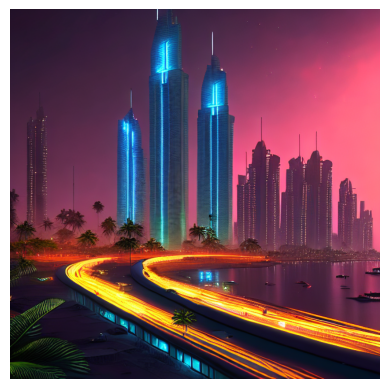

In [32]:
#num_inference_steps
params = {'num_inference_steps':50,"guidance_scale": 8}
generate_image(pipe,prompts,params)

  0%|          | 0/100 [00:00<?, ?it/s]

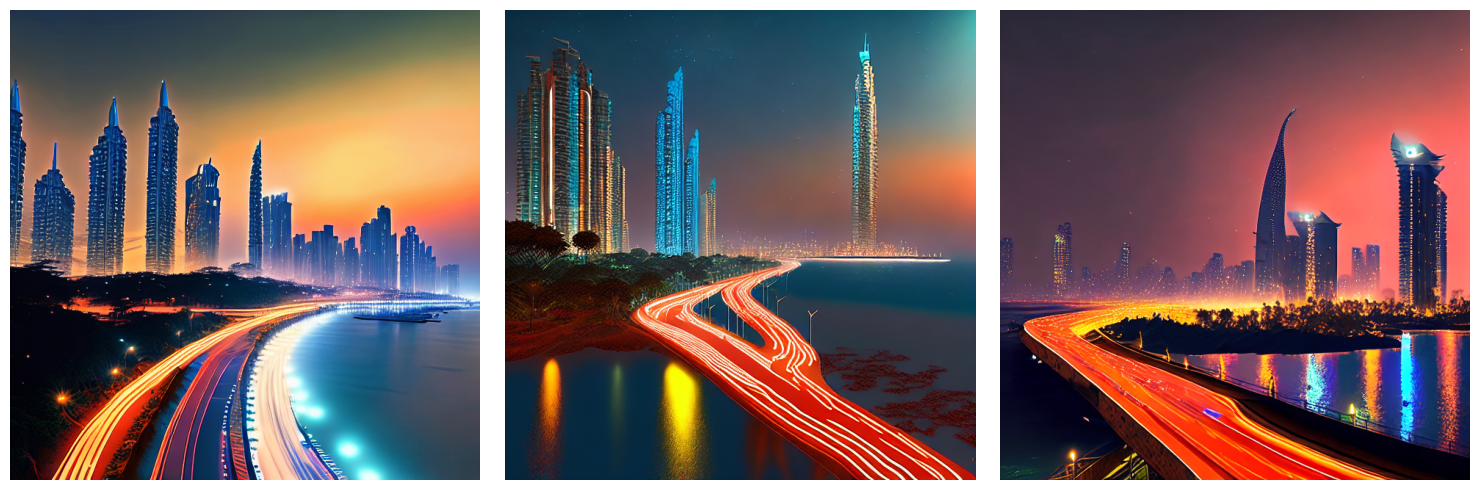

In [33]:
#num_images_per_prompt

params = {'num_inference_steps':100,'num_images_per_prompt':3}
generate_image(pipe,prompts,params)

  0%|          | 0/100 [00:00<?, ?it/s]

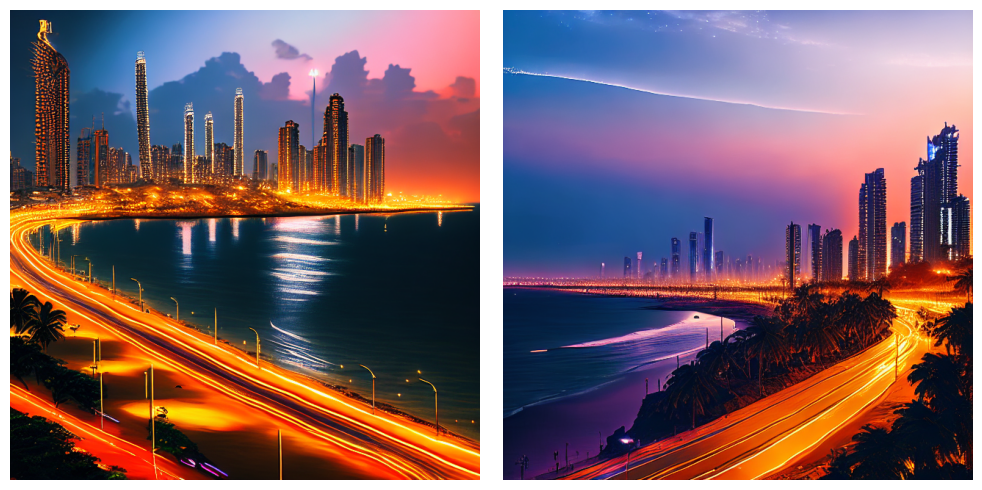

In [ ]:
#negative_prompt

params = {'num_inference_steps':100,'num_images_per_prompt':2,'negative_prompt':'ugly,low_quality'}
generate_image(pipe,prompts,params)